In [168]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [169]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [170]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [248]:
wind_baseline = xr.open_mfdataset('/Volumes/UnionSine/Cropped_DataTransfer/mld&sst&swt/wind speed/wind_baseline_2.6_cropped.nc')

In [249]:
wind_oae = xr.open_mfdataset('/Volumes/UnionSine/Cropped_DataTransfer/mld&sst&swt/wind speed/wind_oae_2.6_cropped.nc')

In [51]:
sst_baseline = sst_baseline.sst[0,:]
sst_oae = sst_oae.sst[0,:]

In [124]:
wind_baseline = wind_baseline.to_dataset(name='wind')
wind_oae = wind_oae.to_dataset(name='wind')

AttributeError: 'Dataset' object has no attribute 'to_dataset'

In [250]:
sliced_wind_baseline = wind_baseline.where((3 < wind_baseline.nav_lon) & (wind_baseline.nav_lon < 3.1) & (52 < wind_baseline.nav_lat) & (wind_baseline.nav_lat < 53), drop=True)
sliced_wind_baseline = sliced_wind_baseline.sel(time_counter=slice('2090', '2100'))

In [251]:
sliced_wind_oae = wind_oae.where((3 < wind_oae.nav_lon) & (wind_oae.nav_lon < 3.1) & (52 < wind_oae.nav_lat) & (wind_oae.nav_lat < 53), drop=True)
sliced_wind_oae = sliced_wind_oae.sel(time_counter=slice('2090', '2100'))

### Data Point Average of SST

In [252]:
sliced_wind_baseline_plot = (sliced_sst_baseline.sst.mean(dim=('y', 'x'))).to_dataset(name='sst')
sliced_wind_oae_plot = (sliced_sst_oae.sst.mean(dim=('y', 'x'))).to_dataset(name='sst')

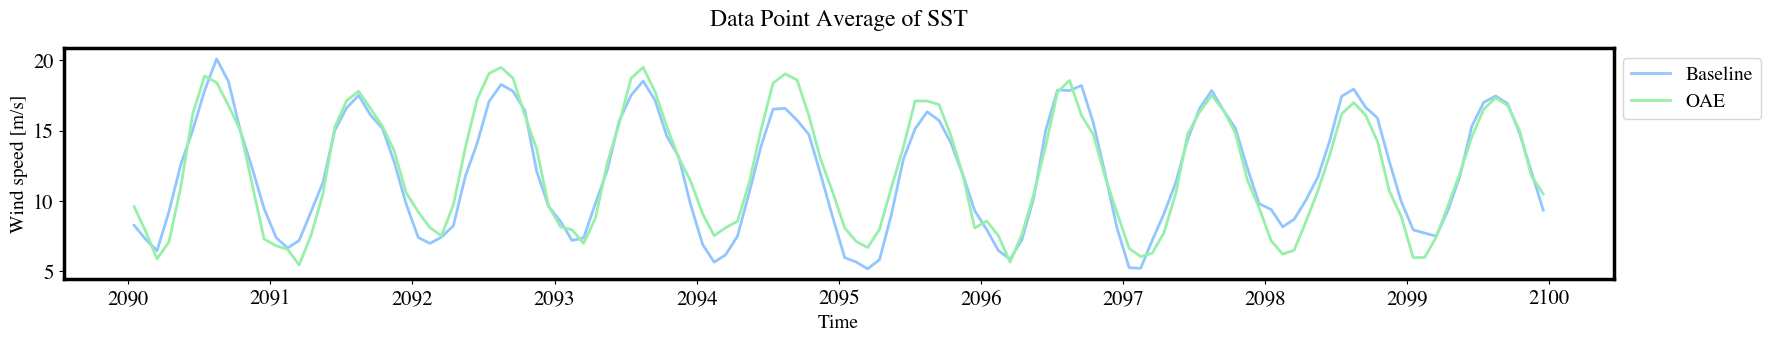

In [253]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_sst_baseline_plot.time_counter, sliced_sst_baseline_plot.sst, linewidth=2, label = 'Baseline')
plt.plot(sliced_sst_oae_plot.time_counter, sliced_sst_oae_plot.sst, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Wind speed [m/s]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Average of SST', fontname="Times", fontsize=17, y=1.06)
plt.show()

In [254]:
sliced_sst_baseline_plot = (sliced_sst_baseline.sst.mean(dim=('y', 'x'))).to_dataset(name='sst')
sliced_sst_oae_plot = (sliced_sst_oae.sst.mean(dim=('y', 'x'))).to_dataset(name='sst')

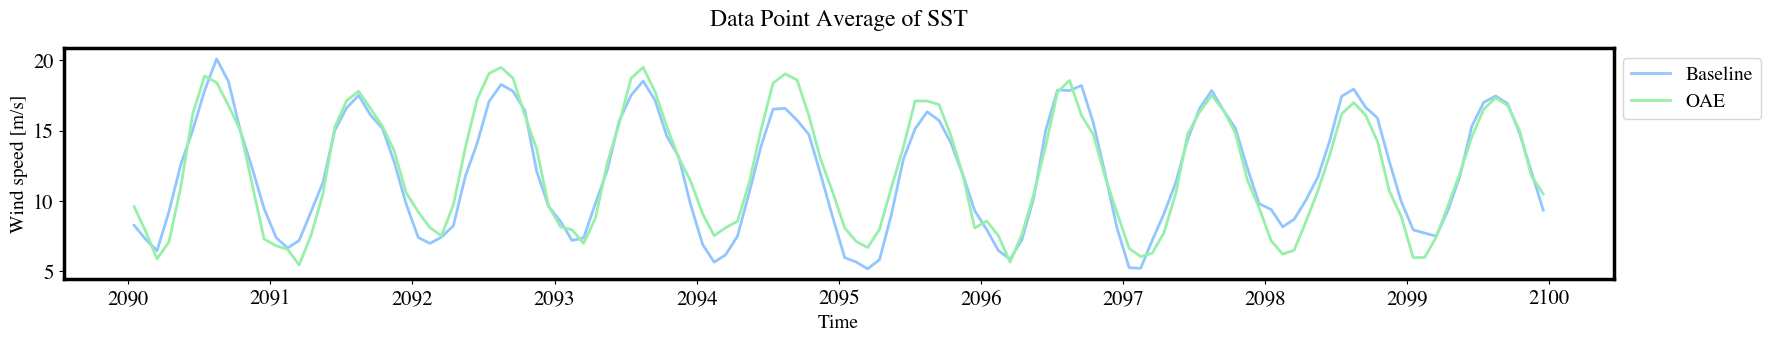

In [255]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_sst_baseline_plot.time_counter, sliced_sst_baseline_plot.sst, linewidth=2, label = 'Baseline')
plt.plot(sliced_sst_oae_plot.time_counter, sliced_sst_oae_plot.sst, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Wind speed [m/s]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Average of SST', fontname="Times", fontsize=17, y=1.06)
plt.show()

### Unweighted Data Point Seasonal Average of SST

In [256]:
# condition

start_date = "2090-01-01"
end_date = "2100-01-01"

In [257]:
wind_baseline = sliced_wind_baseline["wind"].sel(time_counter=slice(start_date, end_date))

In [258]:
wind_seasonal_mean_baseline = (wind_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)).mean(["y", "x"])

In [259]:
wind_oae = sliced_wind_oae["wind"].sel(time_counter=slice(start_date, end_date))

In [260]:
wind_seasonal_mean_oae = (wind_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)).mean(["y", "x"])

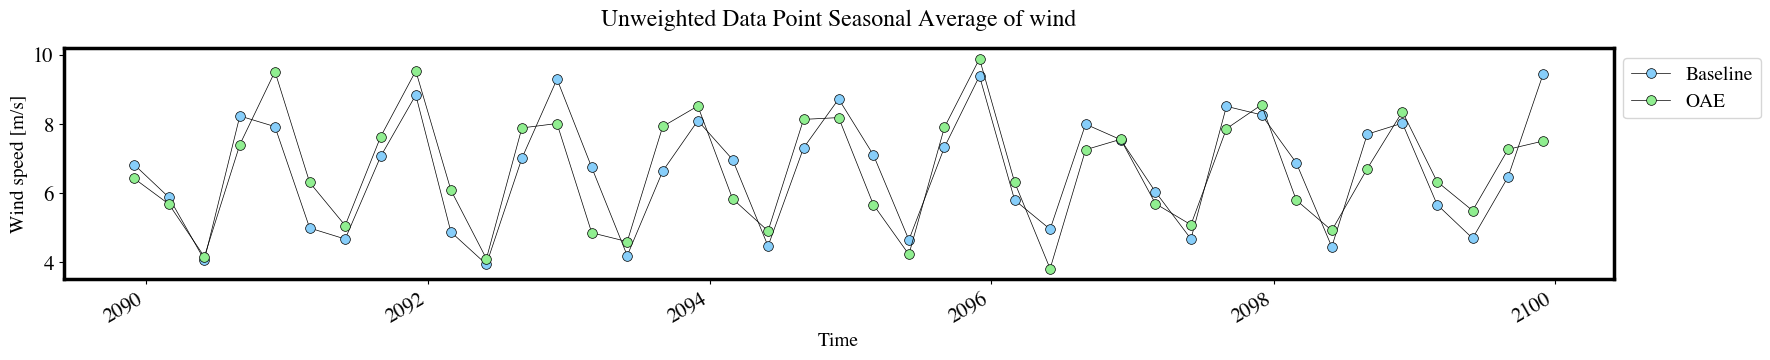

In [261]:
f, ax = plt.subplots(figsize=(20, 3))

wind_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

wind_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted Data Point Seasonal Average of wind", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Wind speed [m/s]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted Data Point Seasonal Average of SST

In [262]:
month_length_baseline = wind_baseline.time_counter.dt.days_in_month
wind_weighted_mean_baseline = ((wind_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
wind_weighted_season_baseline = (wind_weighted_mean_baseline.where(wind_weighted_mean_baseline)).mean(["y", "x"])

In [263]:
month_length_oae = wind_oae.time_counter.dt.days_in_month
wind_weighted_mean_oae = ((wind_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
wind_weighted_season_oae = (wind_weighted_mean_oae.where(wind_weighted_mean_oae)).mean(["y", "x"])

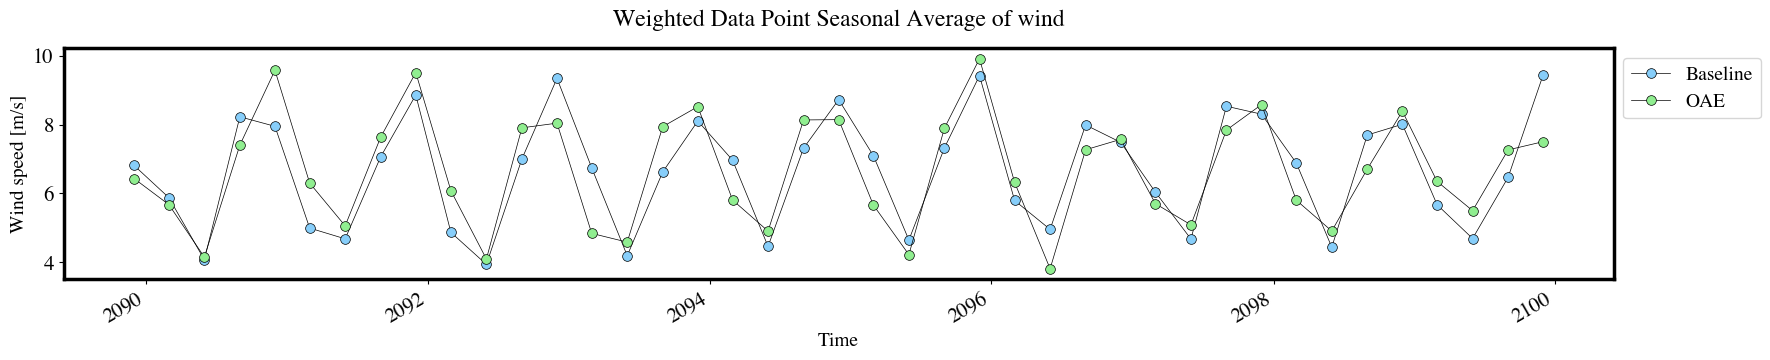

In [264]:
f, ax = plt.subplots(figsize=(20, 3))
wind_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

wind_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted Data Point Seasonal Average of wind", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Wind speed [m/s]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted Data Point Seasonal Average of SST (seasons displayed)

In [265]:
# condition

colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

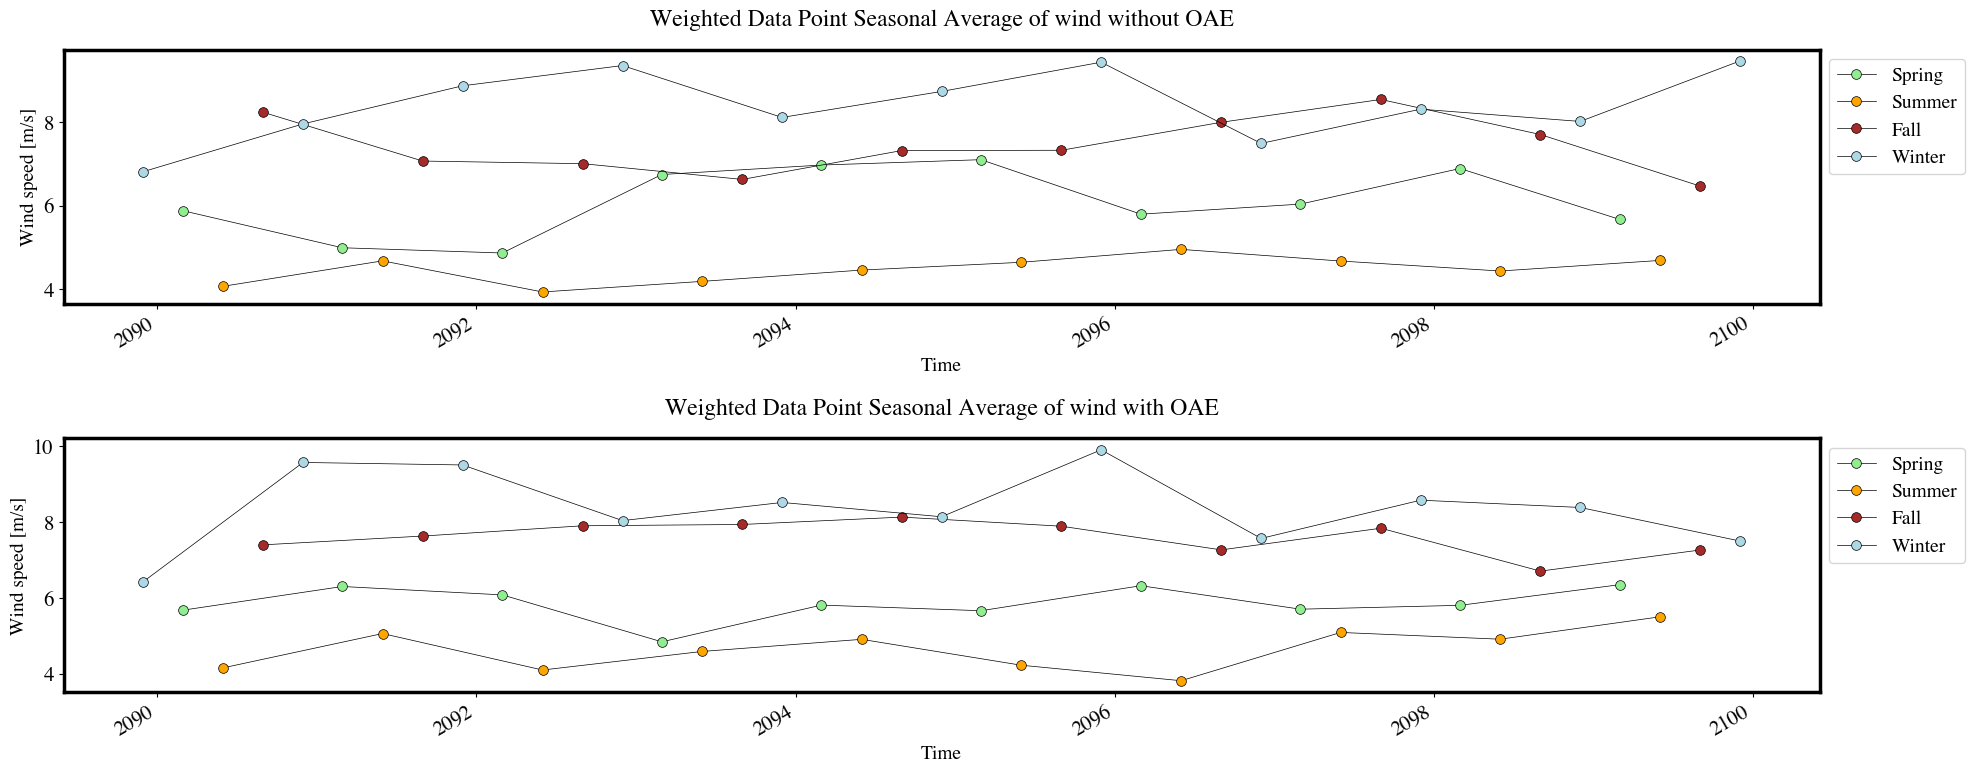

In [266]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in wind_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted Data Point Seasonal Average of wind without OAE", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Wind speed [m/s]', fontsize=14)

for month, arr in wind_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted Data Point Seasonal Average of wind with OAE", fontname="Times", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('Wind speed [m/s]', fontsize=14)
f.tight_layout()
plt.show()

In [267]:
# define handlers for future legends

In [268]:
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

### Weighted Data Point Seasonal Average of SST without OAE (seasons displayed)

In [269]:
wind_weighted_baseline = wind_weighted_season_baseline.to_dataframe('wind')
wind_weighted_baseline['Month'] = pd.DatetimeIndex(wind_weighted_baseline.index).month

In [270]:
# condition

conditions_season = [
    (wind_weighted_baseline['Month'] == 3),
    (wind_weighted_baseline['Month'] == 6),
    (wind_weighted_baseline['Month'] == 9),
    (wind_weighted_baseline['Month'] == 12)
]

values_season = ['Spring', 'Summer', 'Fall', 'Winter']

In [271]:
wind_weighted_baseline['Month'] = np.select(conditions_season, values_season)

In [272]:
# condition

colors_season = dict(zip(wind_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

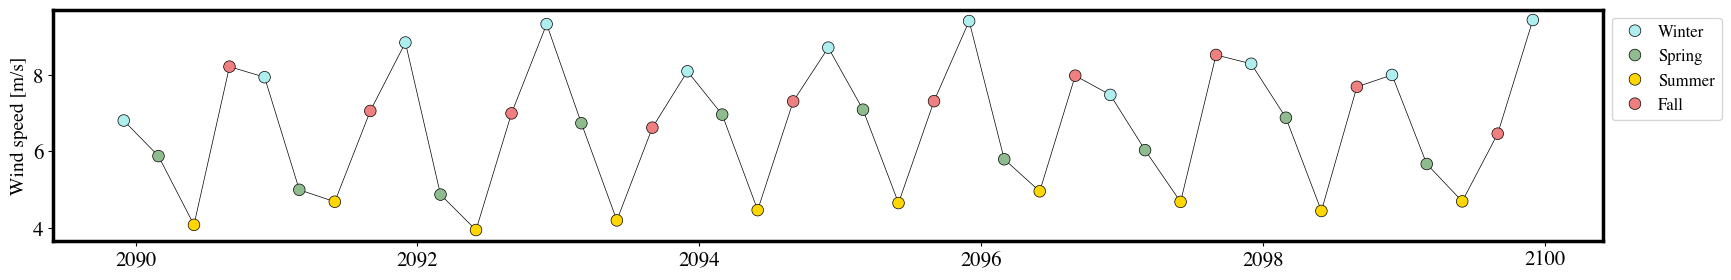

In [273]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(wind_weighted_baseline.index, wind_weighted_baseline.wind, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax.scatter(wind_weighted_baseline.index, wind_weighted_baseline.wind, color=wind_weighted_baseline.Month.map(lambda x: colors_season[x]), edgecolors='black',  linewidth=0.5, s=70)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_season.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=12, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_ylabel('Wind speed [m/s]', fontsize=14)
#ax.set_title("Weighted Data Point Seasonal Average of wind without OAE", fontname="Times", fontsize=17, y=1.06)

pass

### Wind

In [248]:
wind_baseline = xr.open_mfdataset('/Volumes/UnionSine/Cropped_DataTransfer/mld&sst&swt/wind speed/wind_baseline_2.6_cropped.nc')

In [249]:
wind_oae = xr.open_mfdataset('/Volumes/UnionSine/Cropped_DataTransfer/mld&sst&swt/wind speed/wind_oae_2.6_cropped.nc')

In [250]:
sliced_wind_baseline = wind_baseline.where((3 < wind_baseline.nav_lon) & (wind_baseline.nav_lon < 3.1) & (52 < wind_baseline.nav_lat) & (wind_baseline.nav_lat < 53), drop=True)
sliced_wind_baseline = sliced_wind_baseline.sel(time_counter=slice('2090', '2100'))

In [251]:
sliced_wind_oae = wind_oae.where((3 < wind_oae.nav_lon) & (wind_oae.nav_lon < 3.1) & (52 < wind_oae.nav_lat) & (wind_oae.nav_lat < 53), drop=True)
sliced_wind_oae = sliced_wind_oae.sel(time_counter=slice('2090', '2100'))

### Data Point Average of SST

In [252]:
sliced_wind_baseline_plot = (sliced_sst_baseline.sst.mean(dim=('y', 'x'))).to_dataset(name='sst')
sliced_wind_oae_plot = (sliced_sst_oae.sst.mean(dim=('y', 'x'))).to_dataset(name='sst')

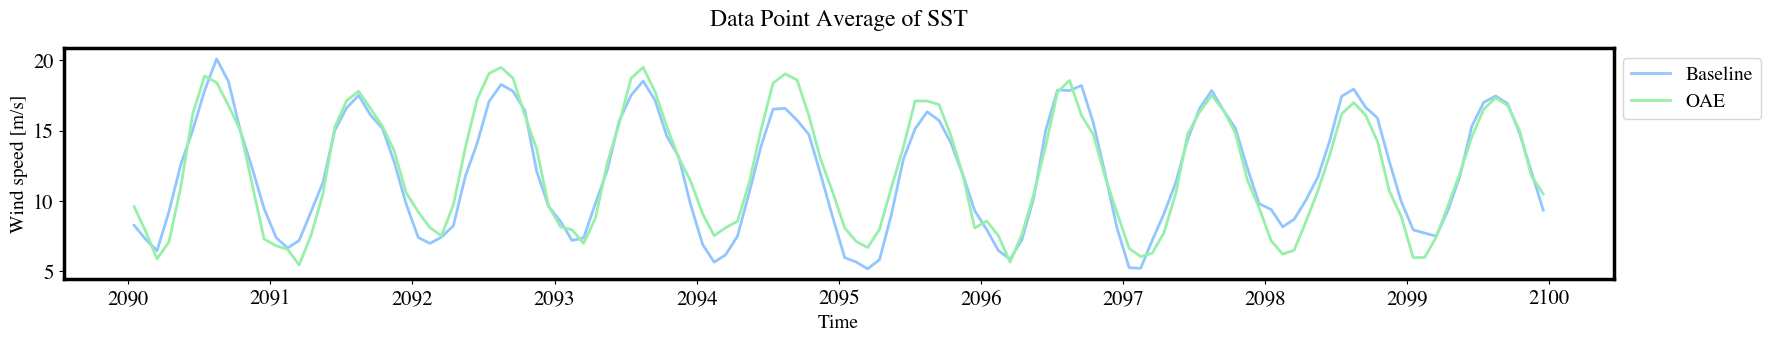

In [253]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_sst_baseline_plot.time_counter, sliced_sst_baseline_plot.sst, linewidth=2, label = 'Baseline')
plt.plot(sliced_sst_oae_plot.time_counter, sliced_sst_oae_plot.sst, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Wind speed [m/s]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Average of SST', fontname="Times", fontsize=17, y=1.06)
plt.show()

In [254]:
sliced_sst_baseline_plot = (sliced_sst_baseline.sst.mean(dim=('y', 'x'))).to_dataset(name='sst')
sliced_sst_oae_plot = (sliced_sst_oae.sst.mean(dim=('y', 'x'))).to_dataset(name='sst')

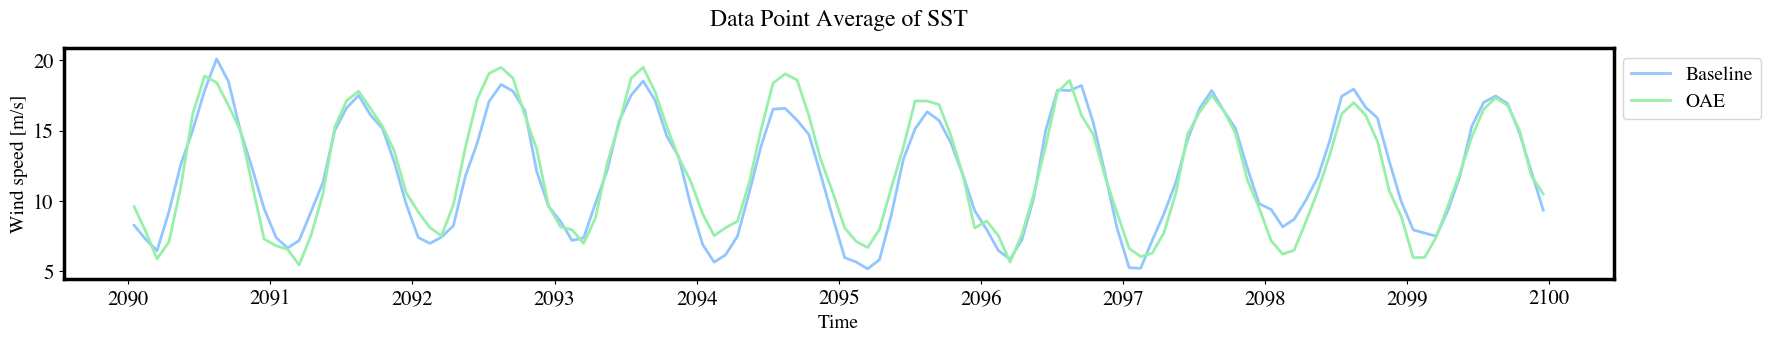

In [255]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_sst_baseline_plot.time_counter, sliced_sst_baseline_plot.sst, linewidth=2, label = 'Baseline')
plt.plot(sliced_sst_oae_plot.time_counter, sliced_sst_oae_plot.sst, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Wind speed [m/s]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Average of SST', fontname="Times", fontsize=17, y=1.06)
plt.show()

### Unweighted Data Point Seasonal Average of wind

In [256]:
# condition

start_date = "2090-01-01"
end_date = "2100-01-01"

In [257]:
wind_baseline = sliced_wind_baseline["wind"].sel(time_counter=slice(start_date, end_date))

In [258]:
wind_seasonal_mean_baseline = (wind_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)).mean(["y", "x"])

In [259]:
wind_oae = sliced_wind_oae["wind"].sel(time_counter=slice(start_date, end_date))

In [260]:
wind_seasonal_mean_oae = (wind_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)).mean(["y", "x"])

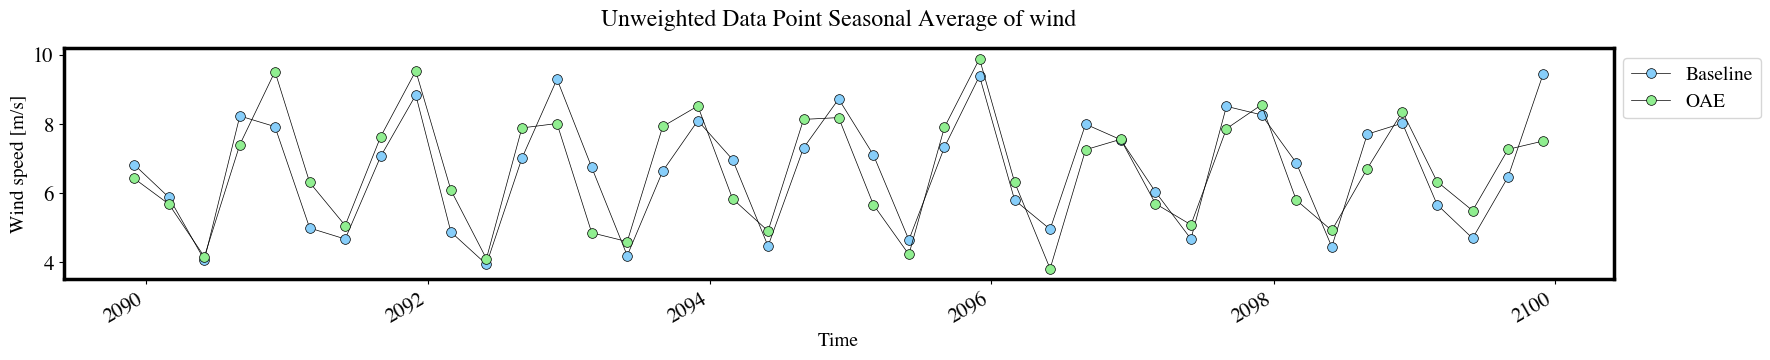

In [261]:
f, ax = plt.subplots(figsize=(20, 3))

wind_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

wind_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted Data Point Seasonal Average of wind", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Wind speed [m/s]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted Data Point Seasonal Average of wind

In [262]:
month_length_baseline = wind_baseline.time_counter.dt.days_in_month
wind_weighted_mean_baseline = ((wind_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
wind_weighted_season_baseline = (wind_weighted_mean_baseline.where(wind_weighted_mean_baseline)).mean(["y", "x"])

In [263]:
month_length_oae = wind_oae.time_counter.dt.days_in_month
wind_weighted_mean_oae = ((wind_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
wind_weighted_season_oae = (wind_weighted_mean_oae.where(wind_weighted_mean_oae)).mean(["y", "x"])

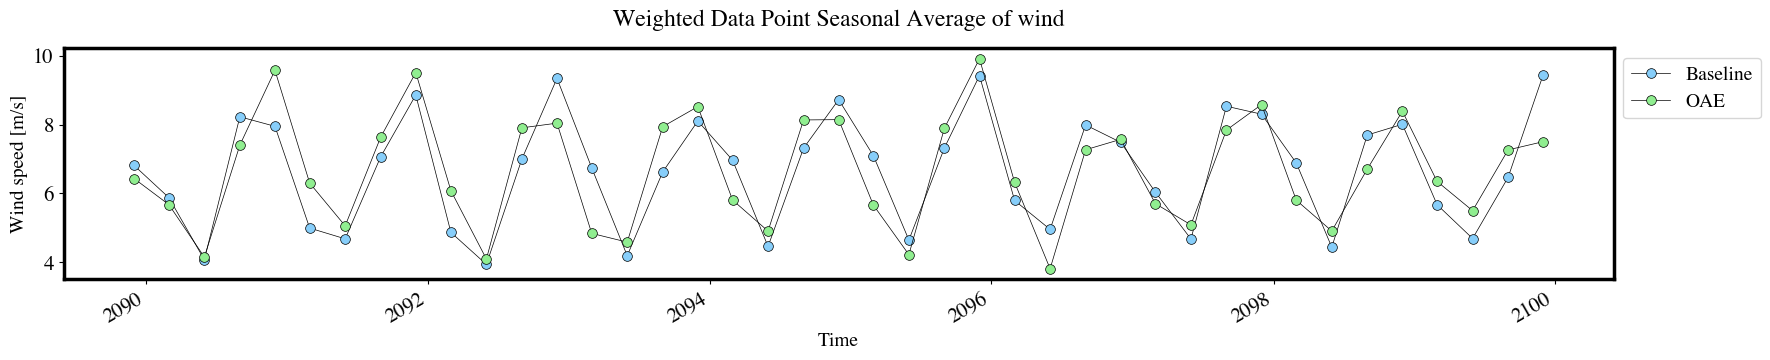

In [264]:
f, ax = plt.subplots(figsize=(20, 3))
wind_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

wind_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted Data Point Seasonal Average of wind", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Wind speed [m/s]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted Data Point Seasonal Average of wind (seasons displayed)

In [265]:
# condition

colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

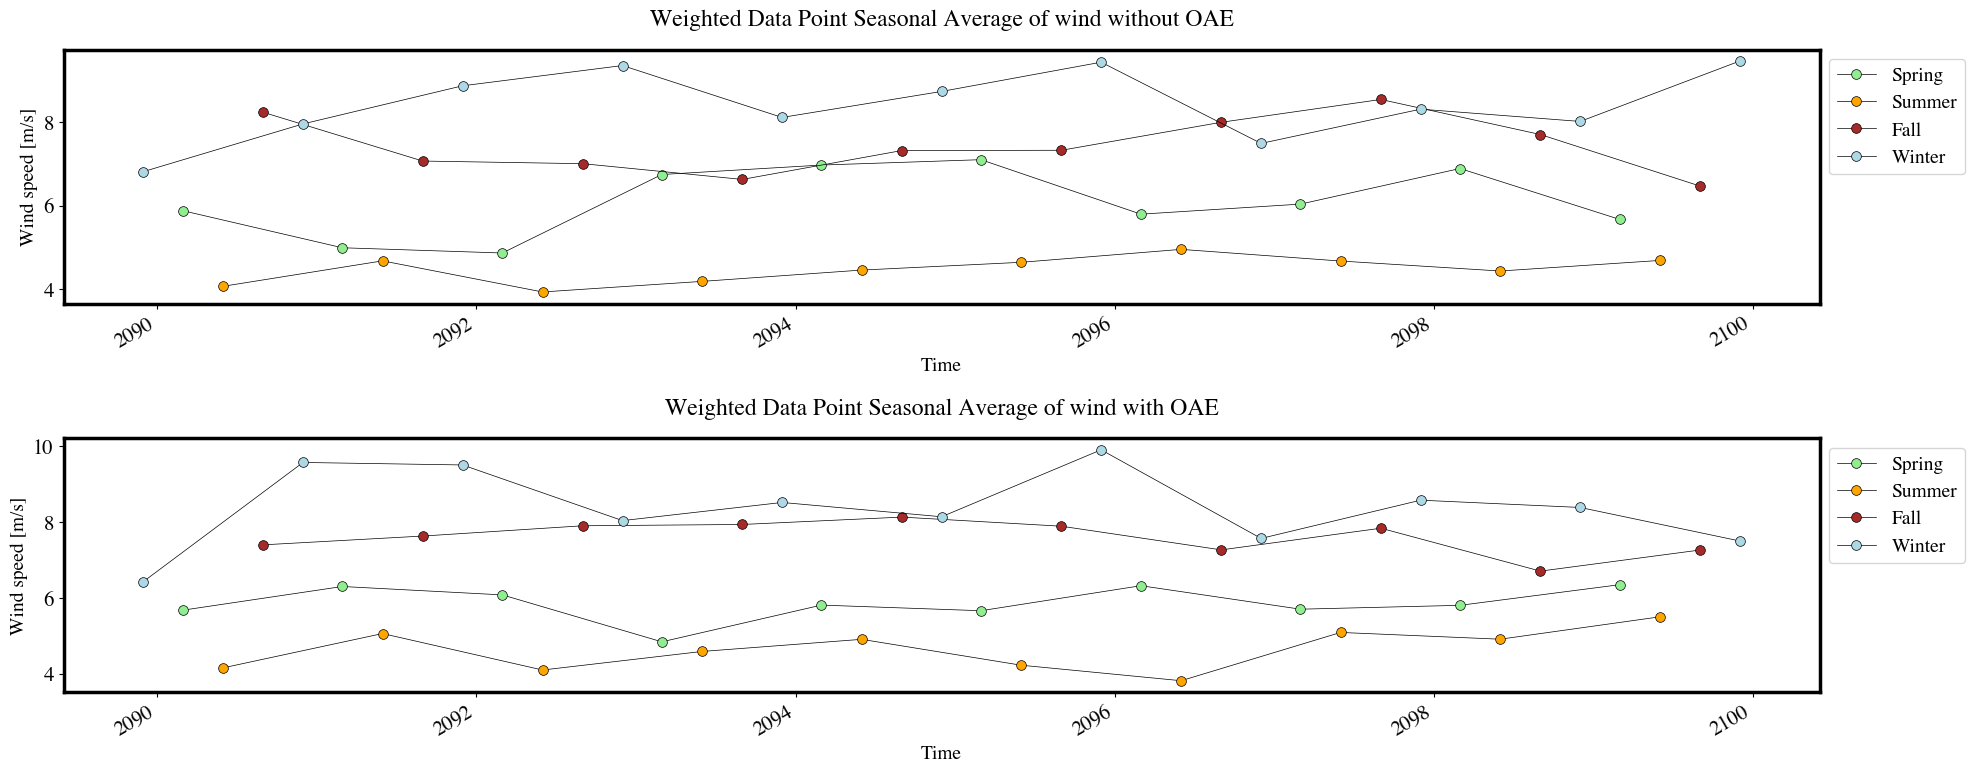

In [266]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in wind_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted Data Point Seasonal Average of wind without OAE", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Wind speed [m/s]', fontsize=14)

for month, arr in wind_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted Data Point Seasonal Average of wind with OAE", fontname="Times", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('Wind speed [m/s]', fontsize=14)
f.tight_layout()
plt.show()

In [267]:
# define handlers for future legends

In [268]:
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

### Weighted Data Point Seasonal Average of wind without OAE (seasons displayed)

In [269]:
wind_weighted_baseline = wind_weighted_season_baseline.to_dataframe('wind')
wind_weighted_baseline['Month'] = pd.DatetimeIndex(wind_weighted_baseline.index).month

In [270]:
# condition

conditions_season = [
    (wind_weighted_baseline['Month'] == 3),
    (wind_weighted_baseline['Month'] == 6),
    (wind_weighted_baseline['Month'] == 9),
    (wind_weighted_baseline['Month'] == 12)
]

values_season = ['Spring', 'Summer', 'Fall', 'Winter']

In [271]:
wind_weighted_baseline['Month'] = np.select(conditions_season, values_season)

In [272]:
# condition

colors_season = dict(zip(wind_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

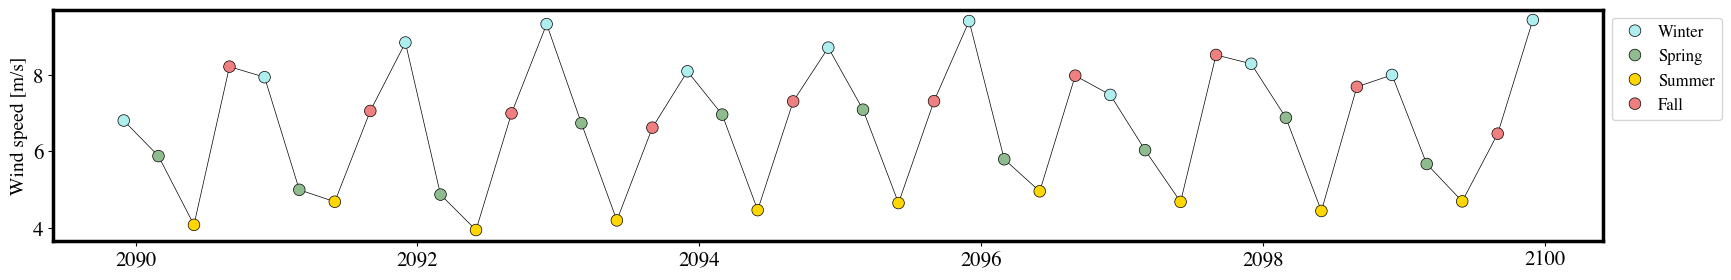

In [273]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(wind_weighted_baseline.index, wind_weighted_baseline.wind, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax.scatter(wind_weighted_baseline.index, wind_weighted_baseline.wind, color=wind_weighted_baseline.Month.map(lambda x: colors_season[x]), edgecolors='black',  linewidth=0.5, s=70)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_season.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=12, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_ylabel('Wind speed [m/s]', fontsize=14)
#ax.set_title("Weighted Data Point Seasonal Average of wind without OAE", fontname="Times", fontsize=17, y=1.06)

pass

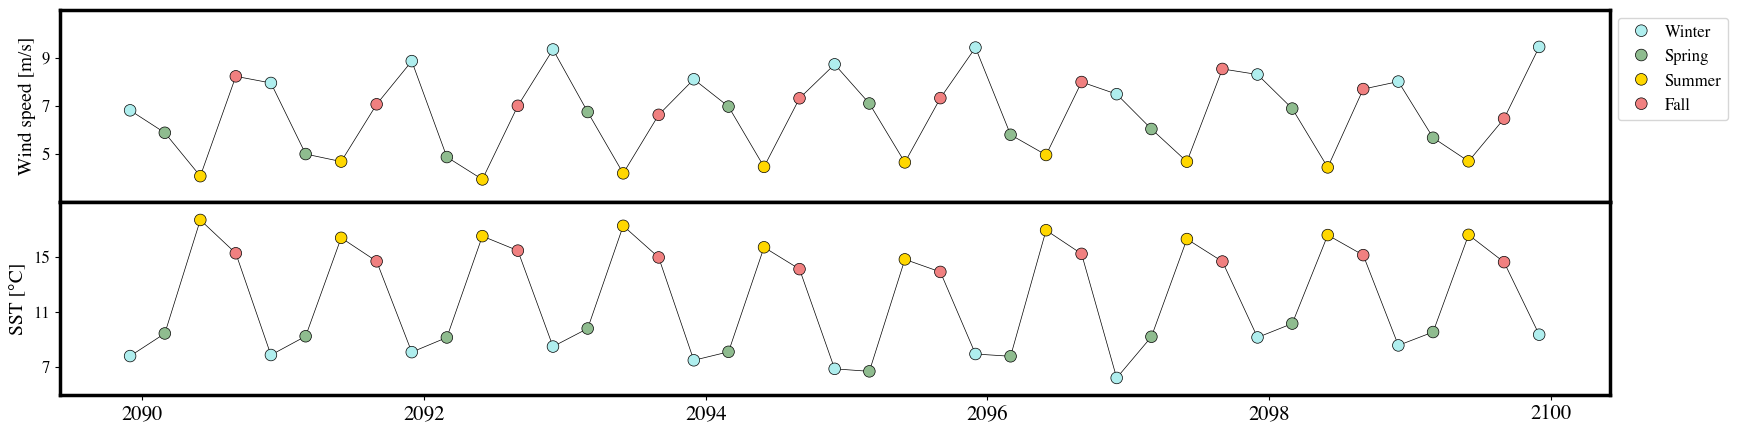

In [296]:
f, (ax, ax2) = plt.subplots(2,1, figsize=(20, 5))  
plt.subplots_adjust(wspace=0, hspace=0)

ax.plot_date(wind_weighted_baseline.index, wind_weighted_baseline.wind, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax.scatter(wind_weighted_baseline.index, wind_weighted_baseline.wind, color=wind_weighted_baseline.Month.map(lambda x: colors_season[x]), edgecolors='black',  linewidth=0.5, s=70)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_season.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=12, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax2.plot_date(sst_weighted_baseline.index, sst_weighted_baseline.sst, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax2.scatter(sst_weighted_baseline.index, sst_weighted_baseline.sst, color=sst_weighted_baseline.Month.map(lambda x: colors_season[x]), edgecolors='black',  linewidth=0.5, s=70)

ax.set_ylabel('Wind speed [m/s]', fontsize=14)
ax2.set_ylabel('SST [°C]', fontsize=14)

start, end = ax.set_ylim(3, 11)
ax.yaxis.set_ticks(np.arange(start+2, end, 2))

start2, end2 = ax2.set_ylim(5, 19)
ax2.yaxis.set_ticks(np.arange(start2+2, end2, 4))

ax.tick_params(axis='y', which='major', labelsize=12)
ax2.tick_params(axis='y', which='major', labelsize=12)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/sst&mld&swt&wind/figures/wind&sst')

pass